# Comparison of $f_0$ contours 

In this notebook we compare the results of three state-of-the-art $f_0$ extractors: pYIN, CREPE and SAC (not publicly available).

### STEPS

1. Convert pYIN output to constant hopsize and unvoiced frames labeled as 0.
2. Resample $f_0$ contours to a common timebase, i.e. SAC's timebase of 5 ms.
3. Read three versions of contours per file
4. Plot some of them for visualization.
5. Further steps include quantify how similar they are. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import mir_eval

import os


DLI_QuartetA_Take5_B1_LRX.csv


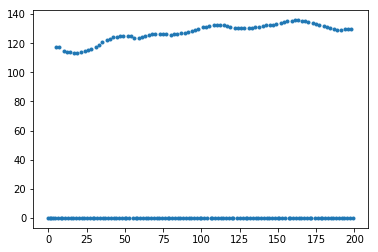

0.0
DLI_QuartetB_Take4_S1_DYN.csv


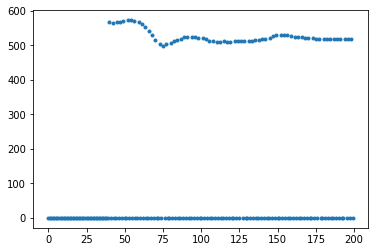

0.0
DLI_QuartetB_Take3_T2_DYN.csv


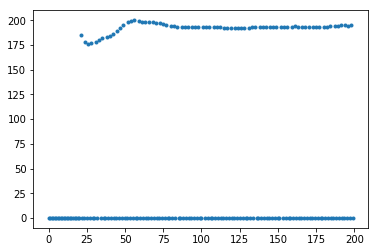

0.0
DLI_QuartetB_Take2_T2_DYN.csv


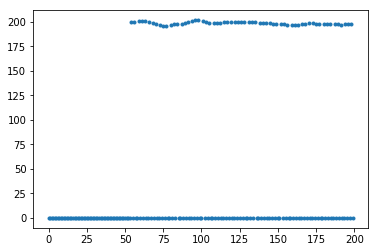

0.0
DLI_All_Take2_T2_HSM.csv


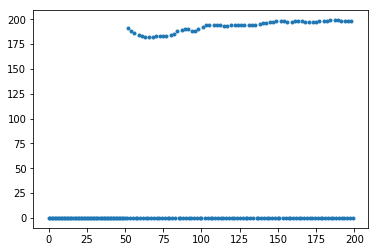

0.0
DLI_All_Take3_T1_LRX.csv


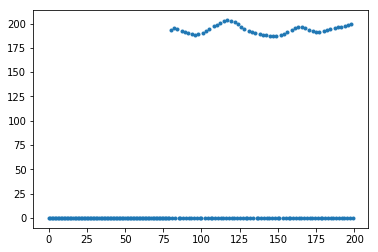

0.0
DLI_All_Take1_A2_LRX.csv


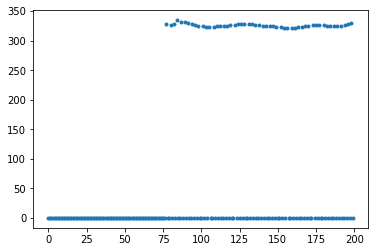

0.0
DLI_QuartetA_Take2_T1_DYN.csv


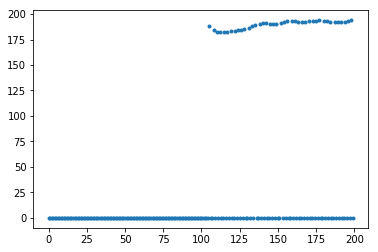

0.0
DLI_QuartetB_Take1_A2_HSM.csv


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [10]:
cr_path = '../pitch/CREPE/'
py_path = '../pitch/pYIN/'
sac_path = '../pitch//SAC/'

for fn in os.listdir(cr_path):
    
    print(fn)
    
    if not fn.endswith('csv'): continue
        
    sac = np.loadtxt(os.path.join(sac_path, fn[:-3]+'f0'))
    timebase = sac[:, 0]
    sac_fr, sac_voic = mir_eval.melody.freq_to_voicing(sac[:, 1])
    sac_freq, _ = mir_eval.melody.resample_melody_series(sac[:, 0], sac[:, 1], sac_voic, timebase, kind='linear')
    
    
    cr = np.array(pd.read_csv(os.path.join(cr_path, fn), header=None))
    
    # use confidence to filter out unvoiced frames, threshold=0.5
    cr[np.where(cr[:,-1] <= 0.5)[0],1] = 0
    cr_fr, cr_voic = mir_eval.melody.freq_to_voicing(cr[:, 1])
    cr_freq, _ = mir_eval.melody.resample_melody_series(cr[:, 0], cr[:, 1], cr_voic, timebase, kind='linear')
    
    
    
    pyi = np.array(pd.read_csv(os.path.join(py_path, fn), header=None))
    
    # pYIN output needs to be re-arranged to match others' format
    idx_tb = np.digitize(pyi[:, 0], timebase)
    pyi_new = np.zeros([len(timebase), 2])
    pyi_new[:, 0] = timebase
    pyi_new[idx_tb, 1] = pyi[:, 1] 
    
    #plt.plot(pyi_new[:,0], pyi_new[:,1], '*'), plt.show()
    

    
    pyi_fr, pyi_voic = mir_eval.melody.freq_to_voicing(pyi_new[:, 1])    
    pyi_freq, _ = mir_eval.melody.resample_melody_series(pyi_new[:, 0], pyi_new[:, 1], pyi_voic, timebase, kind='linear')
    
    plt.plot(pyi_freq[:200],'.')
    plt.show()
    
    '''
    # plot for viz
    
    plt.figure(figsize=(20,10))
    
    plt.subplot(311), plt.plot(timebase, cr_freq, '.r'), plt.title('CREPE')
    plt.subplot(312), plt.plot(timebase, sac_freq, '.g'), plt.title('SAC')
    plt.subplot(313), plt.plot(timebase, pyi_freq, '.m'), plt.title('pYIN')

    plt.tight_layout()
    
    #plt.show()
    plt.savefig('./figs/' + fn[:-3] + 'png', format='png')
    
    '''
    # Compare pairs of f0 tracks frame-wise by computing differences in f0
    print(pyi_freq[100])
    
    d_cr_pyi = np.abs(
        cr_freq - pyi_freq)
    
    d_cr_sac = np.abs(
        cr_freq - sac_freq)
    
    d_pyi_sac = np.abs(
        pyi_freq, sac_freq)
    
    
    
    
    
    
    
